### The final is a small project based on a real world dataset. The dataset is a log of geophysical measurements. The goal of this project is to predict p-wave velocity (Vp) based on other geophysical measurements in the well log. 

### Your submission will be include this notebook and a brief report of your results. Your notebook should be organized according to four tasks described below. In addition, please submit a brief report (about a paragraph per task) discussing the choices you made in each section and which factors motivated your decision.

#### Dataset description

Features
--------
Depth:
GR: **Gamma ray**. Shales and clays are derived from rocks that tend to contain naturally occurring radioactive elements, primarily potassium, uranium and thorium. So, they tend to emit more gamma rays.

NPHI: **Neutron porosity** In the field of formation evaluation, porosity is one of the key measurements to quantify oil and gas reserves. Neutron porosity measurement employs a neutron source to measure the hydrogen index in a reservoir, which is directly related to porosity. The Hydrogen Index (HI) of a material is defined as the ratio of the concentration of hydrogen atoms per cm3 in the material, to that of pure water at 75 °F. As hydrogen atoms are present in both water and oil-filled reservoirs, measurement of the amount allows estimation of the amount of liquid-filled porosity.

RHO: **Density**

SW: **Water Saturation** The fraction of water in a given pore space. It is expressed in volume/volume, percent or saturation units. Unless otherwise stated, water saturation is the fraction of formation water in the undisturbed zone. Usually derived from an empirical law (Archie's Law)


VSH: **Volume of Shale** Estimate of the shale fraction based on the Gamma ray plot. 

PHI: **Porosity**

Target
------
Vp: p-wave velocity

### Your tasks

1) Clean the data. We will exclude some features from our data (provided for you below). The data contains Nans which should be removed and the Vp log has an outlier which should be identified and removed.


2) Feature selection. Several features should be removed in the first section (done for you). From there, you are free to choose features as you see fit.

3) Train/test/validation split. The regression target is a 'time series'. Based on your experience in predicting time series from previous lab and homework exercises, choose a sensible split of the training and test data. You may also consider employing a cross validation strategy.

4) Modelling. This is a regression problem. Use simple oridinary least squaress as a benchmark and try to improve results e.g. with regularization (lasso, ridge, etc). Please explore other regression algorithms available in sci-kit learn as well.

5) Model selection and tuning. Once you have established a suitable benchmark in part 4, tune the hyperparameters of your model to try and improve your results.

6) Prepare the brief report described above. This can be included in a markdown cell in the notebook or submitted in a seperate document.






# Task 1

In [1]:
# Import main libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns

In [2]:
#Read the daata
logs = pd.read_csv('qsiwell2_predict.csv')

#Columns to drop
col_names = ['VS','RHO_OLD','SWX','VPVS','RHOm','RHOf','IP', 'IS', 'ZONE_NUM'] #It is cheating to use VPVS as a feature if you have VS.
logs.drop(col_names, axis=1, inplace=True)

#First row has some empty cells so remove them
logs=logs.iloc[1:,:] 

In [3]:
logs

,DEPTH,VP,GR,NPHI,RHO,SW,VSH,PHI
1,2013.41,2296.7,86.80,0.48,2.24,1.0,0.44,0.29
2,2013.56,2290.4,86.00,0.45,2.24,1.0,0.43,0.29
3,2013.71,2277.5,87.36,0.41,2.24,1.0,0.44,0.29
4,2013.86,2262.0,90.40,0.43,2.24,1.0,0.48,0.30
5,2014.01,2263.1,93.31,0.47,2.24,1.0,0.51,0.30
...,...,...,...,...,...,...,...,...
4112,2639.92,3786.8,59.18,0.09,NaN,NaN,0.12,NaN
4113,2640.07,3786.8,59.18,0.09,NaN,NaN,0.12,NaN
4114,2640.23,3974.8,59.18,0.09,NaN,NaN,0.12,NaN
4115,2640.38,3974.8,59.18,0.09,NaN,NaN,0.12,NaN


In [4]:
logs.isna()

,DEPTH,VP,GR,NPHI,RHO,SW,VSH,PHI
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4112,False,False,False,False,True,True,False,True
4113,False,False,False,False,True,True,False,True
4114,False,False,False,False,True,True,False,True
4115,False,False,False,False,True,True,False,True


In [29]:
#remove Nans
logs.fillna(method = 'ffill')

,DEPTH,VP,GR,NPHI,VSH
1,2013.41,2296.7,86.80,0.48,0.44
2,2013.56,2290.4,86.00,0.45,0.43
3,2013.71,2277.5,87.36,0.41,0.44
4,2013.86,2262.0,90.40,0.43,0.48
5,2014.01,2263.1,93.31,0.47,0.51
...,...,...,...,...,...
4112,2639.92,3786.8,59.18,0.09,0.12
4113,2640.07,3786.8,59.18,0.09,0.12
4114,2640.23,3974.8,59.18,0.09,0.12
4115,2640.38,3974.8,59.18,0.09,0.12


<AxesSubplot:xlabel='VP'>

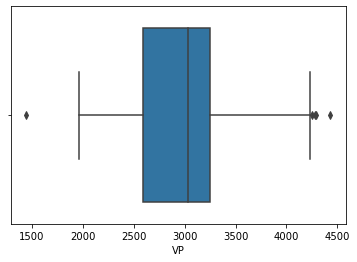

In [6]:
#Vp log has an outlier which should be identified and removed
sns.boxplot(x=logs['VP'])

In [7]:
print(min(logs['VP']))
logs.describe()
vp_mean = 2977.264553
#logs.replace(to_replace=min(logs['VP']), value=2977.264553)
logs['VP'] = logs['VP'].replace([1439.9],2977.3)
logs.value_counts(subset = 'VP', normalize=False, sort=False)




1439.9


VP
1964.7    1
1989.4    1
1997.9    1
2009.7    1
2019.1    1
         ..
4234.2    1
4252.8    1
4277.7    1
4294.9    1
4431.0    1
Length: 3469, dtype: int64

# Task 2
Feature selection. Several features should be removed in the first section (done for you). From there, you are free to choose features as you see fit.

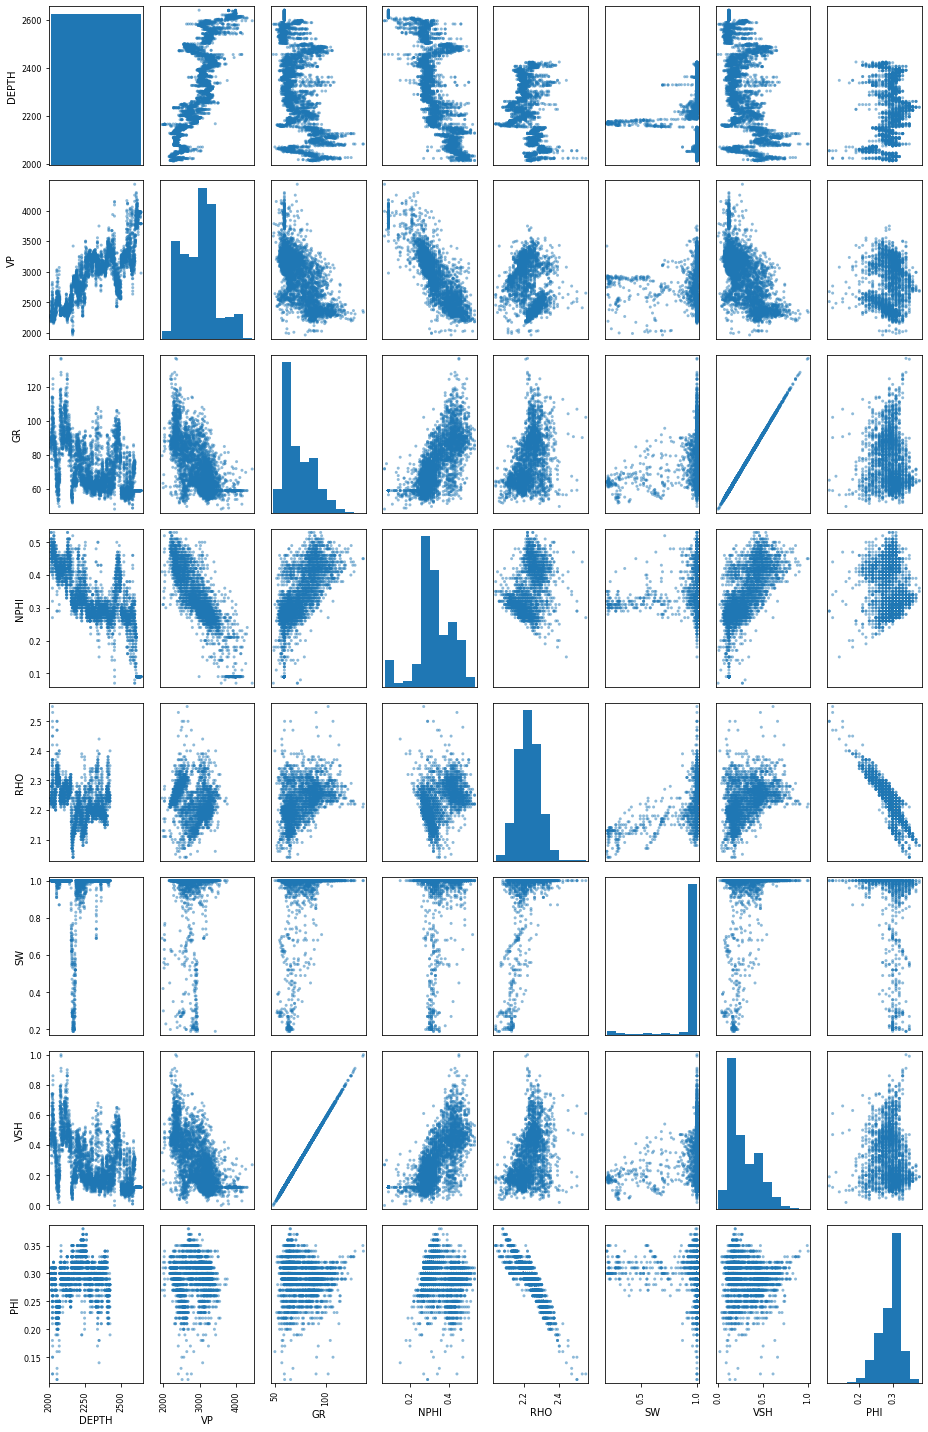

<Figure size 432x288 with 0 Axes>

In [8]:
logs
#remove VP and transfer to new df(target)
#keep the rest?
pd.plotting.scatter_matrix(logs[['DEPTH', 'VP', 'GR', 'NPHI', 'RHO', 'SW', 'VSH', 'PHI']], figsize=(13,20))
plt.tight_layout()
plt.show()
plt.clf()



VP appears to have better correlations with DEPTH, GR, NPHI, and VSH, so I will keep these columns and remove PHI, SW, and RHO. These are also the columns with lots of Nans.

In [9]:
col_names2 = ['PHI', 'SW', 'RHO'] 
logs.drop(col_names2, axis=1, inplace=True)

In [10]:
logs

,DEPTH,VP,GR,NPHI,VSH
1,2013.41,2296.7,86.80,0.48,0.44
2,2013.56,2290.4,86.00,0.45,0.43
3,2013.71,2277.5,87.36,0.41,0.44
4,2013.86,2262.0,90.40,0.43,0.48
5,2014.01,2263.1,93.31,0.47,0.51
...,...,...,...,...,...
4112,2639.92,3786.8,59.18,0.09,0.12
4113,2640.07,3786.8,59.18,0.09,0.12
4114,2640.23,3974.8,59.18,0.09,0.12
4115,2640.38,3974.8,59.18,0.09,0.12


# Task 3
Train/test/validation split. The regression target is a 'time series'. Based on your experience in predicting time series from previous lab and homework exercises, choose a sensible split of the training and test data. You may also consider employing a cross validation strategy.

In [11]:
X = logs.drop(columns=['VP'])

In [12]:
y = logs['VP']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split by time, without shuffling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle = False)


In [14]:
print(X_train)
print(len(X_test))
print(len(y_train))
print(y_test)

[[-1.73160355  0.96946165  1.76523831  0.99348852]
 [-1.73077519  0.91414204  1.4316321   0.93260382]
 [-1.72994682  1.00818537  0.98682382  0.99348852]
 ...
 [ 1.03645981 -1.10018312 -0.57000517 -1.0765911 ]
 [ 1.03728817 -0.95358616 -0.57000517 -0.95482171]
 [ 1.03811654 -1.00613978 -0.57000517 -1.0157064 ]]
824
3292
3293    3245.9
3294    3236.8
3295    3233.2
3296    3241.0
3297    3242.7
         ...  
4112    3786.8
4113    3786.8
4114    3974.8
4115    3974.8
4116    2977.3
Name: VP, Length: 824, dtype: float64


# Task 4
Modelling. This is a regression problem. Use simple oridinary least squaress as a benchmark and try to improve results e.g. with regularization (lasso, ridge, etc). Please explore other regression algorithms available in sci-kit learn as well.

### Ordinary Least Squares Linear Regression

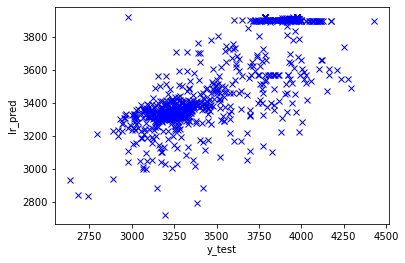

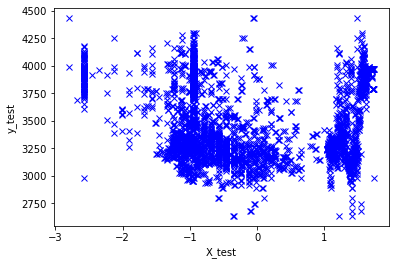

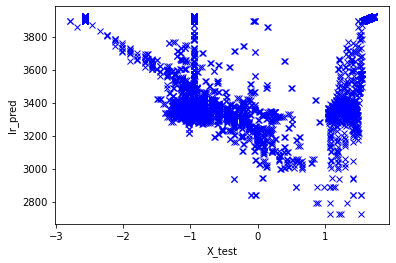

L1 Error(mean absolute error): 150.27179592163725 L2 Error(mean squared error): 41999.19593555245


In [15]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error
#simple ordinary least squares
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_error_l1 = mean_absolute_error(y_test, lr_pred)
lr_error_l2 = mean_squared_error(y_test, lr_pred)
plt.plot(y_test, lr_pred, 'bx')
plt.xlabel('y_test')
plt.ylabel('lr_pred')
plt.show()
plt.plot(X_test, y_test, 'bx')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()
plt.plot(X_test, lr_pred, 'bx')
plt.xlabel('X_test')
plt.ylabel('lr_pred')
plt.show()
print('L1 Error(mean absolute error):',lr_error_l1,'L2 Error(mean squared error):',lr_error_l2)


In [16]:
errors = {'ols_l1': 0.0,
          'lasso_l1': 0.0,
          'Ridge_l1': 0.0,
          'RidgeCV_l1': 0.0,
          'Elas_l1': 0.0,
          'SGDReg_l1': 0.0,
          'ols_l2': 0.0,
          'lasso_l2': 0.0,
          'Ridge_l2': 0.0,
          'RidgeCV_l2': 0.0,
          'Elas_l2': 0.0,
          'SGDReg_l2': 0.0}
errors['ols_l1'] = lr_error_l1
errors['ols_l2'] = lr_error_l2


^Ordinary least squares (benchmark)

### Lasso

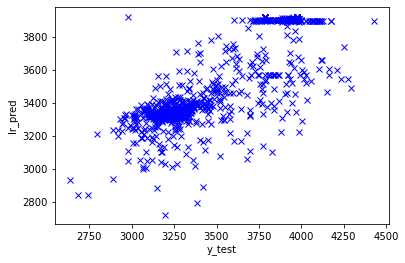

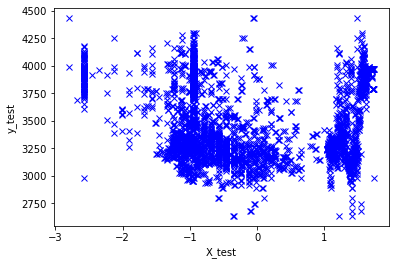

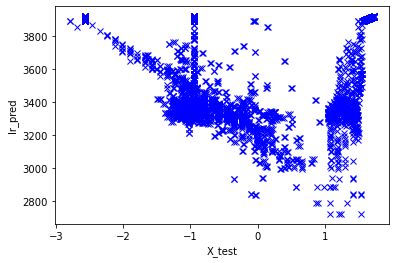

L1 Error(mean absolute error): 150.0494498794245 L2 Error(mean squared error): 41968.43404611244


In [17]:
#lasso
from sklearn.linear_model import Lasso
lr = Lasso()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_error_l1 = mean_absolute_error(y_test, lr_pred)
lr_error_l2 = mean_squared_error(y_test, lr_pred)
plt.plot(y_test, lr_pred, 'bx')
plt.xlabel('y_test')
plt.ylabel('lr_pred')
plt.show()
plt.plot(X_test, y_test, 'bx')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()
plt.plot(X_test, lr_pred, 'bx')
plt.xlabel('X_test')
plt.ylabel('lr_pred')
plt.show()
print('L1 Error(mean absolute error):',lr_error_l1,'L2 Error(mean squared error):',lr_error_l2)

In [18]:
errors['lasso_l1'] = lr_error_l1
errors['lasso_l2'] = lr_error_l2

^lasso method reduced errors a little

### Ridge

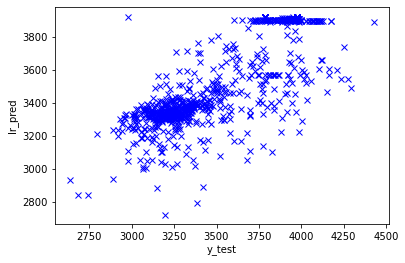

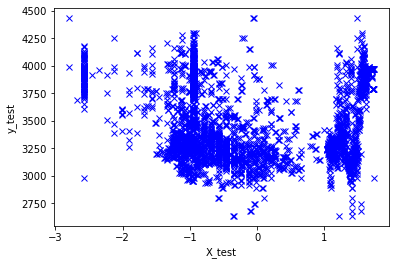

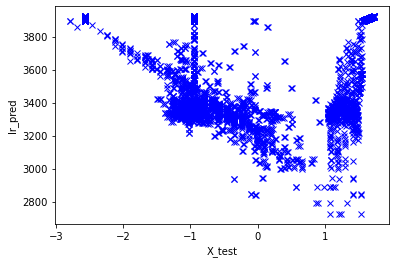

L1 Error(mean absolute error): 150.18237598001602 L2 Error(mean squared error): 41973.75217387222


In [19]:
#ridge
from sklearn.linear_model import Ridge
lr = Ridge()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_error_l1 = mean_absolute_error(y_test, lr_pred)
lr_error_l2 = mean_squared_error(y_test, lr_pred)
plt.plot(y_test, lr_pred, 'bx')
plt.xlabel('y_test')
plt.ylabel('lr_pred')
plt.show()
plt.plot(X_test, y_test, 'bx')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()
plt.plot(X_test, lr_pred, 'bx')
plt.xlabel('X_test')
plt.ylabel('lr_pred')
plt.show()
print('L1 Error(mean absolute error):',lr_error_l1,'L2 Error(mean squared error):',lr_error_l2)

In [20]:
errors['Ridge_l1'] = lr_error_l1
errors['Ridge_l2'] = lr_error_l2

^ridge reduces errors, but not as much as lasso

### ElasticNet

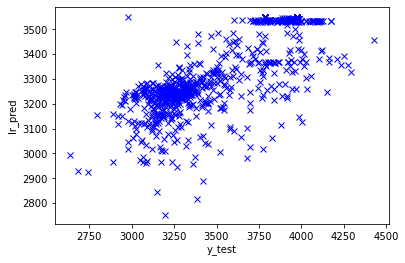

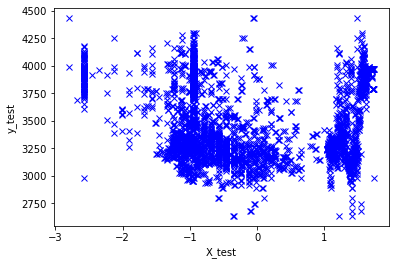

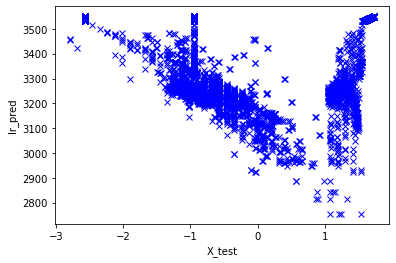

L1 Error(mean absolute error): 238.05015840899466 L2 Error(mean squared error): 97027.67174136711


In [21]:
#elasticnet
from sklearn.linear_model import ElasticNet
lr = ElasticNet()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_error_l1 = mean_absolute_error(y_test, lr_pred)
lr_error_l2 = mean_squared_error(y_test, lr_pred)
plt.plot(y_test, lr_pred, 'bx')
plt.xlabel('y_test')
plt.ylabel('lr_pred')
plt.show()
plt.plot(X_test, y_test, 'bx')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()
plt.plot(X_test, lr_pred, 'bx')
plt.xlabel('X_test')
plt.ylabel('lr_pred')
plt.show()
print('L1 Error(mean absolute error):',lr_error_l1,'L2 Error(mean squared error):',lr_error_l2)

In [22]:
errors['Elas_l1'] = lr_error_l1
errors['Elas_l2'] = lr_error_l2

Elastic net reduces errors more than ridge and lasso.


### RidgeCV

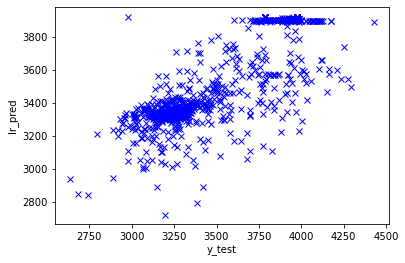

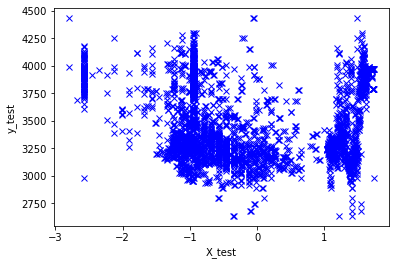

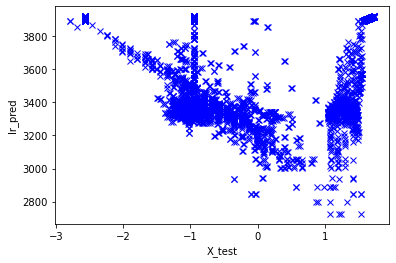

L1 Error(mean absolute error): 150.56171955336438 L2 Error(mean squared error): 42039.28427892758


In [23]:
#RidgeCV
from sklearn.linear_model import RidgeCV
lr = RidgeCV()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_error_l1 = mean_absolute_error(y_test, lr_pred)
lr_error_l2 = mean_squared_error(y_test, lr_pred)
plt.plot(y_test, lr_pred, 'bx')
plt.xlabel('y_test')
plt.ylabel('lr_pred')
plt.show()
plt.plot(X_test, y_test, 'bx')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()
plt.plot(X_test, lr_pred, 'bx')
plt.xlabel('X_test')
plt.ylabel('lr_pred')
plt.show()
print('L1 Error(mean absolute error):',lr_error_l1,'L2 Error(mean squared error):',lr_error_l2)

In [24]:
errors['RidgeCV_l1'] = lr_error_l1
errors['RidgeCV_l2'] = lr_error_l2

### SGDRegressor

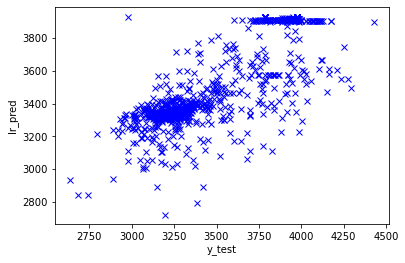

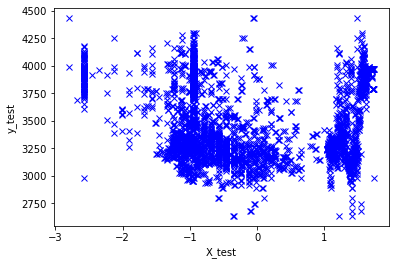

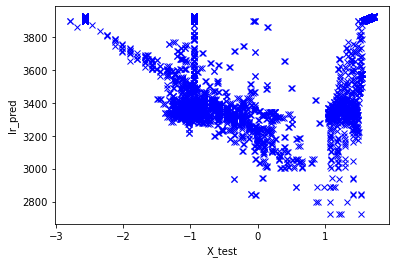

L1 Error(mean absolute error): 150.2703008796839 L2 Error(mean squared error): 41977.603545599064


In [25]:
#SGDRegressor
from sklearn.linear_model import SGDRegressor
lr = SGDRegressor()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_error_l1 = mean_absolute_error(y_test, lr_pred)
lr_error_l2 = mean_squared_error(y_test, lr_pred)
plt.plot(y_test, lr_pred, 'bx')
plt.xlabel('y_test')
plt.ylabel('lr_pred')
plt.show()
plt.plot(X_test, y_test, 'bx')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()
plt.plot(X_test, lr_pred, 'bx')
plt.xlabel('X_test')
plt.ylabel('lr_pred')
plt.show()
print('L1 Error(mean absolute error):',lr_error_l1,'L2 Error(mean squared error):',lr_error_l2)

In [26]:
errors['SGDReg_l1'] = lr_error_l1
errors['SGDReg_l2'] = lr_error_l2

### Errors

In [27]:
for key, value in errors.items():
    
    print(key, ' : ', value)

ols_l1  :  150.27179592163725
lasso_l1  :  150.0494498794245
Ridge_l1  :  150.18237598001602
RidgeCV_l1  :  150.56171955336438
Elas_l1  :  238.05015840899466
SGDReg_l1  :  150.2703008796839
ols_l2  :  41999.19593555245
lasso_l2  :  41968.43404611244
Ridge_l2  :  41973.75217387222
RidgeCV_l2  :  42039.28427892758
Elas_l2  :  97027.67174136711
SGDReg_l2  :  41977.603545599064


From largest to smallest Error: Ordinary least squares linear regression, Ridge/RidgeCV, Lasso, SGDRegressor, ElasticNet.

# Task 5
Model selection and tuning. Once you have established a suitable benchmark in part 4, tune the hyperparameters of your model to try and improve your results.

In [28]:
#smallest error using lasso with tol = 5e-3 and selection = 'random'
lr = Lasso(tol = 5e-3, selection = 'random')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_error_l1 = mean_absolute_error(y_test, lr_pred)
lr_error_l2 = mean_squared_error(y_test, lr_pred)
print('L1 Error(mean absolute error):',lr_error_l1,'L2 Error(mean squared error):',lr_error_l2)

L1 Error(mean absolute error): 150.99704390208504 L2 Error(mean squared error): 42124.81410156482


# Task 6
 Prepare the brief report described above. This can be included in a markdown cell in the notebook or submitted in a seperate document.

   The first task was to clean the data by removing Nans and an outlier. First, I looked at logs and used .isna() to approximate where the Nans were. Next, I removed the Nans and replaced them with the last non-value in the column using .fillna(‘ffill’). If I were to do this again, I would probably replace these values with the mean of the column because there were lots of Nans in a row and this might skew all the data. This did not end up mattering because I ended up removing the columns with the majority of the Nans in task 2. Next, I used a box plot and .describe() to find out what the outlier was. Both of these showed that there was one value, 1439.9, in VP that was much lower than the rest. I replaced this with the mean of the VP column.

   The second task was feature selection. Since I knew VP was the target, I wanted to see the correlation between VP and all the features. So, I made scatter plots across all of the features, which were similar to the plots we made in Lab 4. By looking at the second column, I could see the correlation between VP and the other features. VP appeared to have better correlations with DEPTH, GR, NPHI, and VSH, so I kept these columns and removed PHI, SW, and RHO. These were also the columns with lots of Nans.

   The third task was to split the data into training data and testing data. First, I made a new dataframe that was logs without the target column, VP. I named this X. Next I made y, which was just the VP column. I scaled X using StandardScaler and then split X and y into X_train, y_train, X_test, and y_test using train_test_split. Initially, I set test_size = 0.5. When I was working on task 5, however, I played around with this value and the lower it was, the lower the error was for all methods. So in this step, I decided to lower test_size down to 0.2.

   The fourth task was to model the data. I started with LinearRegression (ordinary least squares). I used X_train and y_train to train and then had it predict the target values for the X_test data. I didn’t change any parameters so it could be used as a benchmark. Then I found my model’s mean absolute error and it’s mean squared error so that I could look at both L1 and L2 errors. I also graphed the observed values (y_test) vs. the predicted values (lr_pred), X_test vs. the observed values, and X_test vs. the predicted values. This is so I could have a better visual of the accuracy of the predicted data. Next I repeated this with regularization to try to improve the results. I used Lasso, Ridge, ElasticNet, RidgeCV, and SGDRegressor. I then printed all of the errors together so that they would be easy to compare. Initially, the method with the smallest error was ElasticNet, but then I found that when I decreased the test size, ElasticNet had a larger error than all the other methods, so I decided it wasn’t the best choice. I ultimately decided that Lasso was the best regularization method to use because it consistently had the smallest or second smallest error.

   The fifth task was to choose the best model and tune the model’s parameters to optimize it. I decided to use Lasso because it had consistently small errors for both L1 and L2. I tried many parameters of this model that increased error, such as increasing alpha and setting normalize = True. When I increased max iterations there was no change. There were, however, two parameters that shrank the error.  When I increased the tolerance from 1e-4 to 5e-3 the error decreased. When I set selection = ‘random’ instead of ‘cyclic’, the model assigned random coefficients at every iteration instead of looping through features sequentially. This also decreased the error. So, my final model used Lasso regularization, had a tolerance of 5e-3, and assigned random coefficients at every iteration.
